For today's warmup, we will practice our matplotlib visualization skills while visualizing bird sighting data gathered from the Cornell Ornithology [eBird API](https://documenter.getpostman.com/view/664302/S1ENwy59).

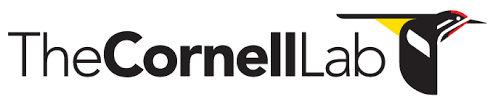

# Task 1: Most Common Bird Bar Chart

The dictionary loaded above contains recent counts of bird species sighted in Central Park. 

Recent visitors to the park include this little dude:

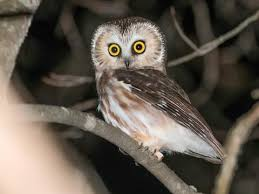

Your first task is to make a bar chart visualizing the counts of the top 10 most commonly sighted birds in the park. You should aspire to use the fig, ax = plt.subplots() syntax, but if your not there yet, use the plt stateless syntax.

The first challenge is to sort the dictionary.  Google how to do so.  

In [10]:
sorted_birds = sorted(central_park_birds.items(), key=lambda x: x[1], reverse=True)

with open('data/sorted_birds', 'wb') as write_file:
    pickle.dump(sorted_birds, write_file)

Next, select the first 10 birds in the sorted_birds object. 
Then create two separate lists: one list containing the bird names, and one list containing the counts.  These lists should preserve the relationship between name and count by aligned indices.

In [18]:
top_10_bird_names = [bird[0] for bird in sorted_birds][:10]
top_10_bird_counts = [bird[1] for bird in sorted_birds][:10]

Now, create a bar chart with these two lists.  You may have some tick problems, which I'll let you sort out your own solution to. Don't forget plt.subplots()

Also, don't forget a title and axis labels

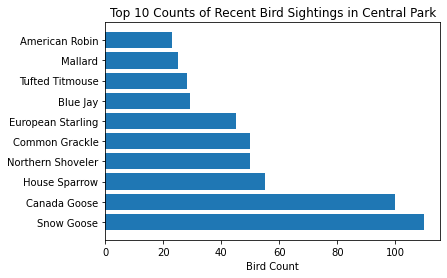

In [21]:

fig, ax = plt.subplots()
ax.barh(top_10_bird_names, top_10_bird_counts)
ax.set_title('Top 10 Counts of Recent Bird Sightings in Central Park')
ax.set_xlabel('Bird Count');

# Task 2: Crow Distributions

Now we will broaden our territory, but focus on a single species: The American Crow.
    
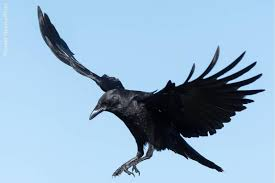

The above cell loaded 3 lists of crow sighting counts near the central latitude/longitude of Central Park, Chicago's Loop, and Seattle.

One could say each element represents a murder.

The first part of the task is to make a histogram visualizing the distribution of number of crows per sighting.

So, firstly, you must create a new list that merges all 3 lists.

In [25]:

all_crows = cp_crows + loop_crows + seattle_crows

Now, create a histogram that shows the distribution of crow counts.

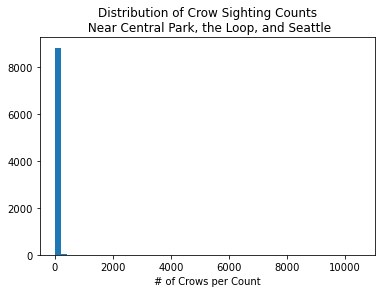

In [30]:
fig, ax = plt.subplots()
ax.hist(all_crows, bins = 50)
ax.set_title('Distribution of Crow Sighting Counts\n Near Central Park, the Loop, and Seattle')
ax.set_xlabel('# of Crows per Count');

Your histogram should have looked pretty boring: 1 large spike near zero, with an x-axis range from 0 to around 10000.

Pray for the people of Seattle if that major outlier is not an input error.

Next, let's plot a boxplot to see what it tells us.

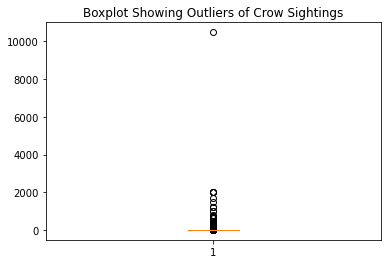

In [32]:
fig, ax = plt.subplots()
ax.boxplot(all_crows)
ax.set_title('Boxplot Showing Outliers of Crow Sightings');

The boxplot should also look odd. Those little circles are the outliers.  Recreate the boxplot, but this time remove the outliers via the `showfliers` argument.

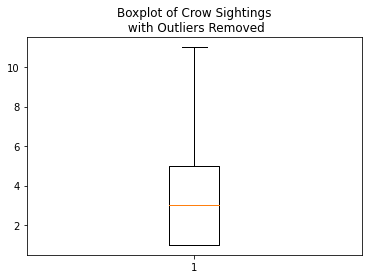

In [35]:
fig, ax = plt.subplots()
bp = ax.boxplot(all_crows, showfliers=False)
ax.set_title('Boxplot of Crow Sightings\n with Outliers Removed');

By removing the fliers, we can see the components of the boxplot: the median at 3 crows, and the top and bottom edges of the box representing the interquartile ranges, and the whiskers, which are 1.5 times the IQR above the top of the box.

If you assign the boxplot axis to a variable (perhaps bp), you can then access information about the plot. We can get the value of the end of the whisker, i.e. the value whereafter matplotlib designates points as outliers, via the following code `bp['whiskers'][1].get_ydata()`

Given the above output, reduce the original all_crows object to contain only non-outlier elements.

In [38]:
all_crows_nofliers = [crow_count for crow_count in all_crows if crow_count <= 11]

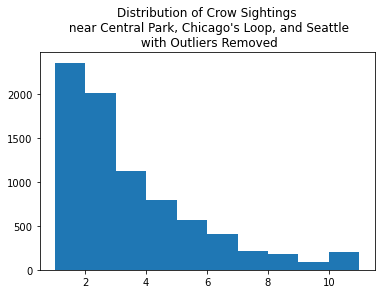

In [42]:
fig, ax = plt.subplots()
ax.hist(all_crows_nofliers)
ax.set_title('Distribution of Crow Sightings\n near Central Park, Chicago\'s Loop, and Seattle\n with Outliers Removed');